In [1]:
 #*******************************************************************************************
 #
 #  File Name:  weather.ipynb 
 #
 #  File Description:
 #      This interactive Python notebook, weather.ipynb, is a Python script to 
 #      visualize the weather of over 500 cities of varying distances from the equator. 
 #      The script uses the citipy Python module and the openWeatherMap API to create 
 #      a representative model of weather across cities.
 #      
 #
 #  Date            Description                             Programmer
 #  ----------      ------------------------------------    ------------------
 #  08/12/2023      Initial Development                     Nicholas J. George
 #
 #******************************************************************************************/

import logx
import matplotlibx
import pandasx
import weather_constants
import weatherx

import pandas as pd

pd.options.mode.chained_assignment = None

In [2]:
CONSTANT_LOCAL_FILE_NAME = 'weather.ipynb'


logx.set_log_mode(False)

logx.set_image_mode(False)


logx.begin_program('weather')

# <br> **Section 1: Weather Data Acquisition**

## **1.1: City List**

In [3]:
city_string_list = weatherx.return_city_names_list()

## **1.2: Weather Data from City List**

In [4]:
city_weather_dataframe = weatherx.return_weather_dataframe(city_string_list)

logx.log_write_object(city_weather_dataframe)


CITY WEATHER DATA RETRIEVAL BEGINS...


Processing record #1 of set 1 for city, oranjemund.

Processing record #2 of set 1 for city, howard springs.

Processing record #3 of set 1 for city, yellowknife.

Processing record #4 of set 1 for city, bethel.

Processing record #5 of set 1 for city, bredasdorp.

Processing record #6 of set 1 for city, adamstown.

Processing record #7 of set 1 for city, gaigeturi.

Processing record #8 of set 1 for city, talnakh.

Processing record #9 of set 1 for city, luderitz.

Processing record #10 of set 1 for city, avarua.

Processing record #11 of set 1 for city, vasil'yevo.

Processing record #12 of set 1 for city, dudinka.

Processing record #13 of set 1 for city, longyearbyen.

Processing record #14 of set 1 for city, newman.

Processing record #15 of set 1 for city, taiohae.

The script did not find the city, taiohae. Skipping...

Processing record #16 of set 1 for city, college.

Processing record #17 of set 1 for city, hamilton.

Processing record

## **1.3: Records Count**

In [5]:
records_count_integer = city_weather_dataframe['city'].count()

logx.print_and_log_text(f'There are {records_count_integer} records in the city weather dataframe.')

There are 744 records in the city weather dataframe.


## **1.4: Display City Weather Data Set**

In [6]:
pandasx.return_formatted_table(city_weather_dataframe, 'Table: 1.4: City Weather Information')

## **1.5: Display City Weather Locations**

In [7]:
hover_columns_string_list \
    = ['city', 'latitude', 'longitude', 'temperature', 'humidity', 'cloudiness', 'wind_speed', 'country']

pandasx.display_dataframe_hvplot \
    (city_weather_dataframe,
     'Figure 1.5: City Weather Locations',
     'city', 'humidity', 'longitude', 'latitude',
     hover_columns_string_list = hover_columns_string_list)

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [longitude,latitude]   (city,humidity,temperature,cloudiness,wind_speed,country)

## **1.6: Export City Weather Data to CSV File**

In [8]:
city_weather_dataframe.to_csv \
    (weather_constants.CONSTANT_WEATHER_DATA_FILE_PATH,
     index_label = weather_constants.CONSTANT_WEATHER_DATA_FILE_INDEX_NAME)

## **1.7: Import City Weather Data from CSV File**

In [9]:
city_weather_import_dataframe \
    = pd.read_csv \
        (weather_constants.CONSTANT_WEATHER_DATA_FILE_PATH,
         index_col = weather_constants.CONSTANT_WEATHER_DATA_FILE_INDEX_NAME)

## **1.8: Display Imported City Weather Data Set**

In [10]:
pandasx.return_formatted_table(city_weather_import_dataframe, 'Table: 1.8: Imported City Weather Information')

## **1.9: Display Imported City Weather Locations**

In [11]:
pandasx.display_dataframe_hvplot \
    (city_weather_import_dataframe,
     'Figure 1.9: Imported City Weather Locations',
     'city', 'humidity', 'longitude', 'latitude',
     hover_columns_string_list = hover_columns_string_list)

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [longitude,latitude]   (city,humidity,temperature,cloudiness,wind_speed,country)

# **Section 2: Scatter Plots**

## **2.1: Temperature vs. Latitude**

r-value:     0.8829
r-squared:   0.7795


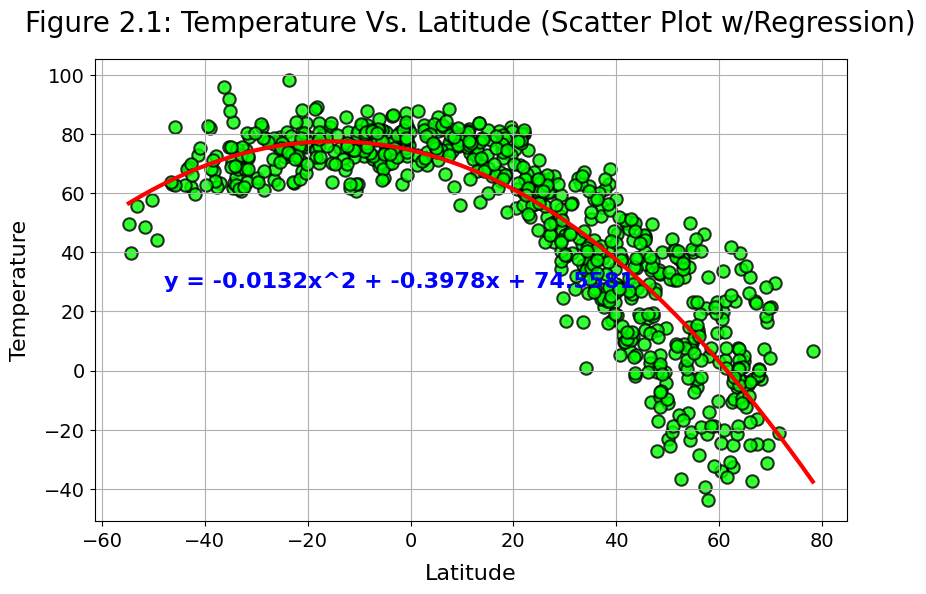

In [12]:
matplotlibx.display_scatter_plot_from_xy_series \
    (city_weather_import_dataframe['latitude'], city_weather_import_dataframe['temperature'],
     'Figure 2.1: Temperature Vs. Latitude (Scatter Plot w/Regression)', 
     'Latitude' , 'Temperature', 2, -48.0, 28.0)

## **Discussion about the linear relationship:** 
### Although this analysis uses linear regression, I notice that a relationship between the independent variable, latitude, and the dependent variable, temperature, exists but is not linear.  With quadratic regression, the correlation is 0.8858, a stark contrast to the correlation with linear regression of -0.5298. In practiice, analysts consider a 0.60-0.79 correlation to be strong.  

### What do these results mean?  The maximum temperature is hottest at the equator and cools down as we move towards either the North Pole or the South Pole.  On top of that, while correlation tells us there is a relationship between two variables, it does not indicate cause and effect.

## **2.2: Humidity vs. Latitude**

r-value:     0.3757
r-squared:   0.1411


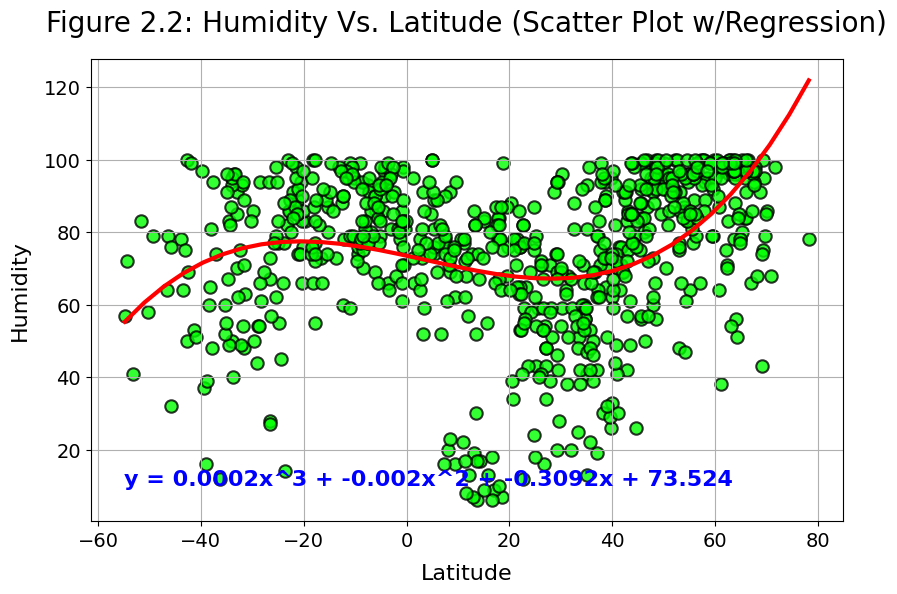

In [13]:
matplotlibx.display_scatter_plot_from_xy_series \
    (city_weather_import_dataframe['latitude'], city_weather_import_dataframe['humidity'],
     'Figure 2.2: Humidity Vs. Latitude (Scatter Plot w/Regression)', 
     'Latitude' , 'Humidity', 3, -55.0, 10.0)

## **2.3: Cloudiness vs. Latitude**

r-value:     0.2190
r-squared:   0.0480


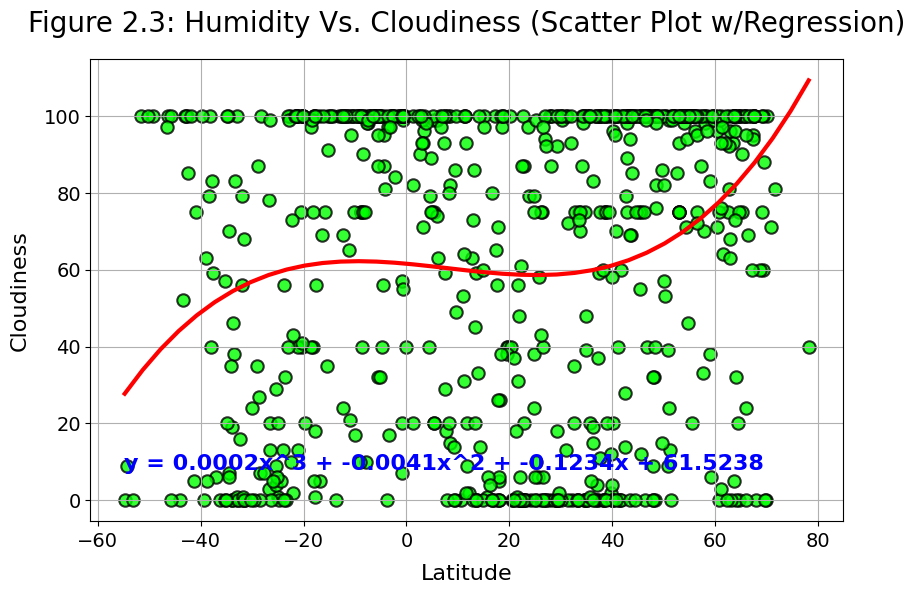

In [14]:
matplotlibx.display_scatter_plot_from_xy_series \
    (city_weather_import_dataframe['latitude'], city_weather_import_dataframe['cloudiness'],
     'Figure 2.3: Humidity Vs. Cloudiness (Scatter Plot w/Regression)', 
     'Latitude' , 'Cloudiness', 3, -55.0, 8.0)

## **2.4: Wind Speed vs. Latitude**

r-value:     0.0519
r-squared:   0.0027


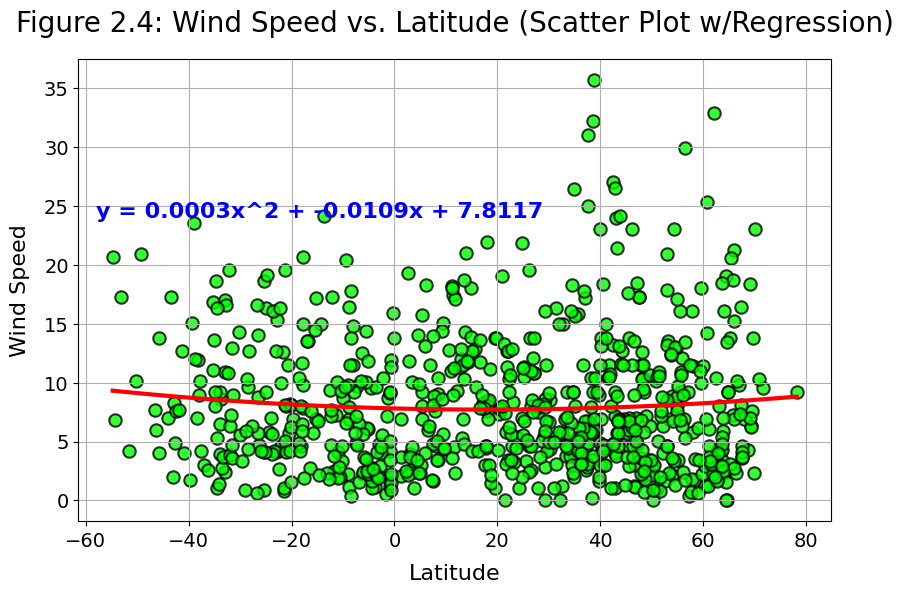

In [15]:
matplotlibx.display_scatter_plot_from_xy_series \
    (city_weather_import_dataframe['latitude'], city_weather_import_dataframe['wind_speed'],
     'Figure 2.4: Wind Speed vs. Latitude (Scatter Plot w/Regression)', 
     'Latitude' , 'Wind Speed', 2, -58.0, 24.0)

## **2.5: City Weather Data Set Correlation Matrix**

In [16]:
frame_dictionary \
    = {'latitude': city_weather_import_dataframe['latitude'], 
       'temperature': city_weather_import_dataframe['temperature'], 
       'humidity': city_weather_import_dataframe['humidity'],
       'cloudiness': city_weather_import_dataframe['cloudiness'],
       'wind_speed': city_weather_import_dataframe['wind_speed']}

correlation_dataframe = pd.DataFrame(frame_dictionary).corr()

pandasx.return_formatted_table \
    (correlation_dataframe, 'Table 2.5: City Weather Correlation Matrix', hide_index_boolean = False)

# **Section 3: City Weather Data By Hemisphere**

## **3.1: City Weather Data Set (Northern Hemisphere)**

In [17]:
northern_dataframe \
    = city_weather_import_dataframe.loc[(city_weather_import_dataframe['latitude'] >= 0.0), :]

logx.log_write_object(northern_dataframe)

### **Display City Weather Data Set (Northern Hemisphere)**

In [18]:
pandasx.return_formatted_table \
    (northern_dataframe, 'Table: 3.1: City Weather Data Set (Northern Hemisphere)')

### **Display City Weather Locations (Northern Hemisphere)**

In [19]:
pandasx.display_dataframe_hvplot \
    (northern_dataframe,
     'Figure 3.1: City Weather Locations (Northern Hemisphere)',
     'city', 'humidity', 'longitude', 'latitude',
     hover_columns_string_list = hover_columns_string_list)

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [longitude,latitude]   (city,humidity,temperature,cloudiness,wind_speed,country)

## **3.2: City Weather Data Set (Southern Hemisphere)**

In [20]:
southern_dataframe \
    = city_weather_import_dataframe.loc[(city_weather_import_dataframe['latitude'] < 0.0), :]

logx.log_write_object(southern_dataframe)

### **Display City Weather Data Set (Southern Hemisphere)**

In [21]:
pandasx.return_formatted_table \
    (southern_dataframe, 'Table: 3.2: City Weather Information (Southern Hemisphere)')

### **Display City Weather Locations (Southern Hemisphere)**

In [22]:
pandasx.display_dataframe_hvplot \
    (southern_dataframe,
     'Figure 3.2: City Weather Locations (Southern Hemisphere)',
     'city', 'humidity', 'longitude', 'latitude',
     hover_columns_string_list = hover_columns_string_list)

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [longitude,latitude]   (city,humidity,temperature,cloudiness,wind_speed,country)

## **3.3: City Weather Data Set (Eastern Hemisphere)**

In [23]:
eastern_dataframe \
    = city_weather_import_dataframe.loc[(city_weather_import_dataframe['longitude'] >= 0.0), :]

logx.log_write_object(eastern_dataframe)

### **Display City Weather Data Set (Eastern Hemisphere)**

In [24]:
pandasx.return_formatted_table \
    (eastern_dataframe, 'Table: 3.3: City Weather Information (Eastern Hemisphere)')

### **Display City Weather Locations (Eastern Hemisphere)**

In [25]:
pandasx.display_dataframe_hvplot \
    (eastern_dataframe,
     'Figure 3.3: City Weather Locations (Eastern Hemisphere)',
     'city', 'humidity', 'longitude', 'latitude',
     hover_columns_string_list = hover_columns_string_list)

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [longitude,latitude]   (city,humidity,temperature,cloudiness,wind_speed,country)

## **3.4: City Weather Data Set (Western Hemisphere)**

In [26]:
western_dataframe \
    = city_weather_import_dataframe.loc[(city_weather_import_dataframe['longitude'] < 0.0), :]

logx.log_write_object(western_dataframe)

### **Display City Weather Data Set (Western Hemisphere)**

In [27]:
pandasx.return_formatted_table \
    (western_dataframe, 'Table: 3.4: City Weather Information (Western Hemisphere)')

### **Display City Weather Locations (Western Hemisphere)**

In [28]:
pandasx.display_dataframe_hvplot \
    (western_dataframe,
     'Figure 3.4: City Weather Locations (Western Hemisphere)',
     'city', 'humidity', 'longitude', 'latitude',
     hover_columns_string_list = hover_columns_string_list)

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [longitude,latitude]   (city,humidity,temperature,cloudiness,wind_speed,country)

# **Section 4: Scatter Plots w/Linear Regression by Latitude**

## **4.1: Temperature vs. Latitude**

### Display Temperature vs. Latitude (Northern Hemisphere)

r-value:     -0.8504
r-squared:   0.7232



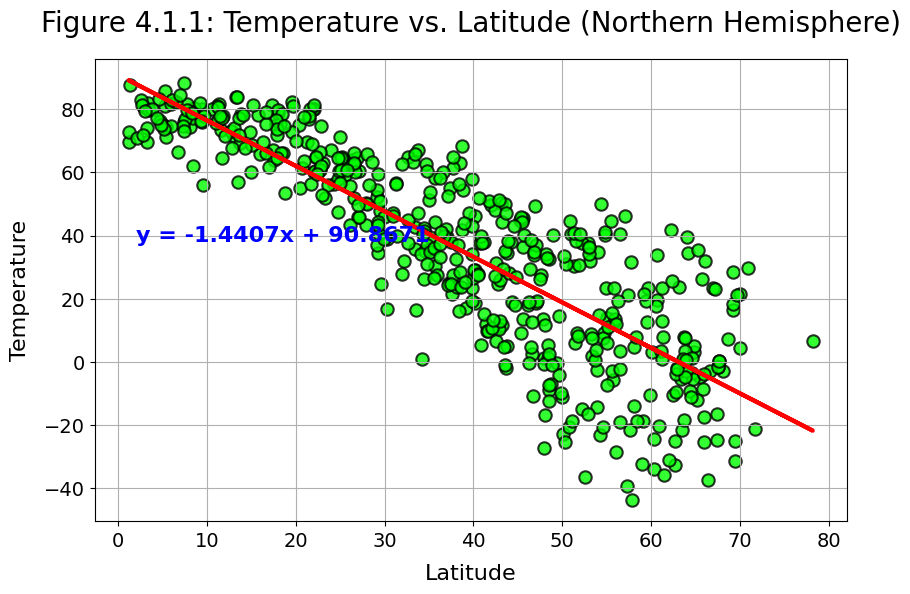

In [29]:
matplotlibx.display_scatter_plot_from_xy_series \
    (northern_dataframe['latitude'], northern_dataframe['temperature'],
     'Figure 4.1.1: Temperature vs. Latitude (Northern Hemisphere)',
     'Latitude' , 'Temperature', 1, 2.0, 38.0)

 ### Display Temperature vs. Latitude (Southern Hemisphere)

r-value:     0.4351
r-squared:   0.1893



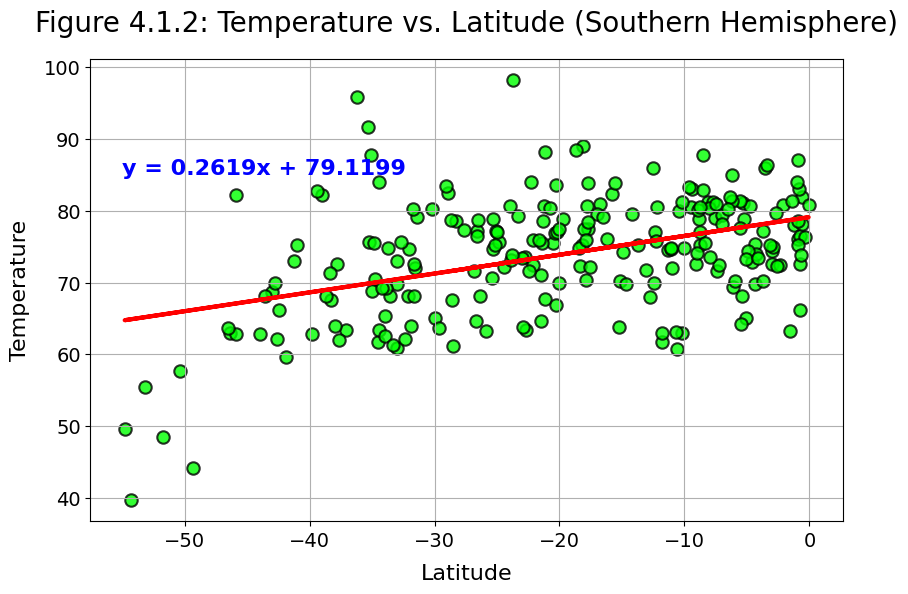

In [30]:
matplotlibx.display_scatter_plot_from_xy_series \
    (southern_dataframe['latitude'], southern_dataframe['temperature'],
     'Figure 4.1.2: Temperature vs. Latitude (Southern Hemisphere)',
     'Latitude' , 'Temperature', 1, -55.0, 85.0)

 ### Display Temperature vs. Latitude (Eastern Hemisphere)

r-value:     0.9085
r-squared:   0.8253


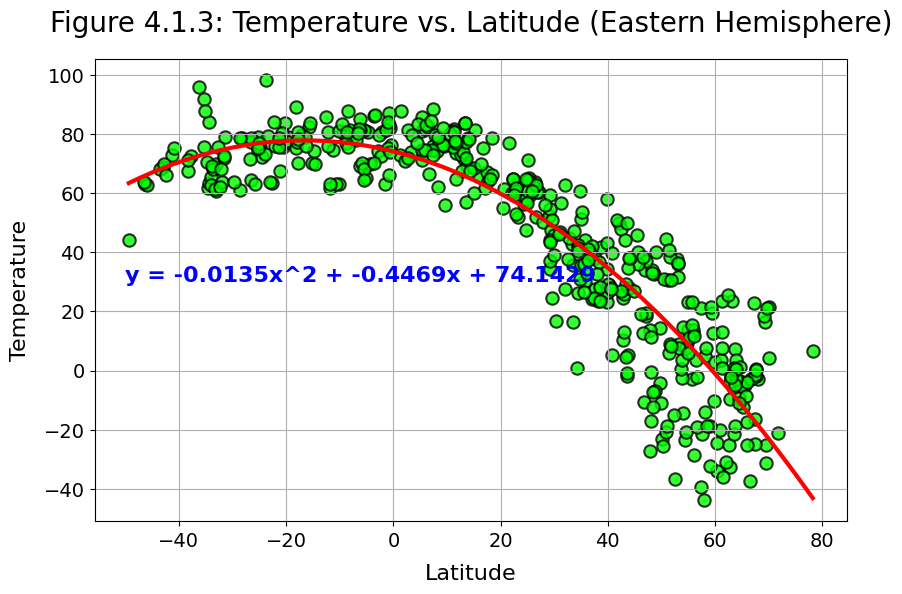

In [31]:
matplotlibx.display_scatter_plot_from_xy_series \
    (eastern_dataframe['latitude'], eastern_dataframe['temperature'],
     'Figure 4.1.3: Temperature vs. Latitude (Eastern Hemisphere)',
     'Latitude' , 'Temperature', 2, -50.0, 30.0)

 ### Display Temperature vs. Latitude (Western Hemisphere)

r-value:     0.8203
r-squared:   0.6729


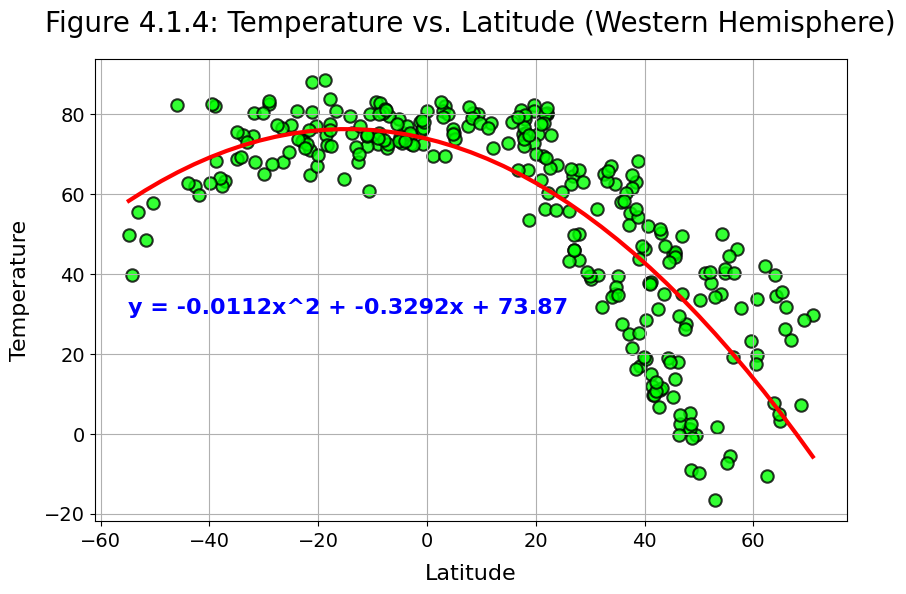

In [32]:
matplotlibx.display_scatter_plot_from_xy_series \
    (western_dataframe['latitude'], western_dataframe['temperature'],
     'Figure 4.1.4: Temperature vs. Latitude (Western Hemisphere)',
     'Latitude' , 'Temperature', 2, -55.0, 30.0)

## **Discussion about the linear relationship:** 
### In the northern hemisphere, the latitude is negatively correlated with temperature; this negative correlation tells us that the two variables move in opposite directions: as latitude increases, the temperature drops, and vice versa.  In the southern hemisphere, the latitude is positively correlated with temperature: this positive correlation tells us that the two variables move in the same direction: as latitude increases, the temperature increases.  From the results of the quadratic regression, in both the eastern and western hemispheres, the latitude is positively correlated with temperature. 

### What do these results mean?  The maximum temperature is hottest at the equator and cools down as we move towards either the North Pole or the South Pole. On top of that, while correlation tells us there is a relationship between two variables, it does not indicate cause and effect.

## **4.2: Humidity vs. Latitude**

### **Display Humidity vs. Latitude (Northern Hemisphere)**

r-value:     0.4252
r-squared:   0.1808



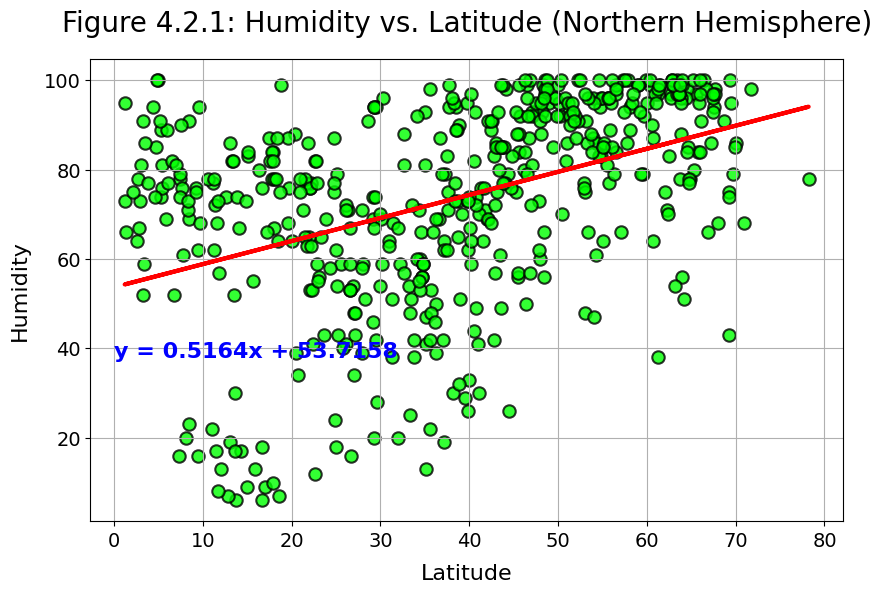

In [33]:
matplotlibx.display_scatter_plot_from_xy_series \
    (northern_dataframe['latitude'], northern_dataframe['humidity'],
     'Figure 4.2.1: Humidity vs. Latitude (Northern Hemisphere)',
     'Latitude' , 'Humidity', 1, 0.0, 38.0)

### **Display Humidity vs. Latitude (Southern Hemisphere)**

r-value:     0.3945
r-squared:   0.1556



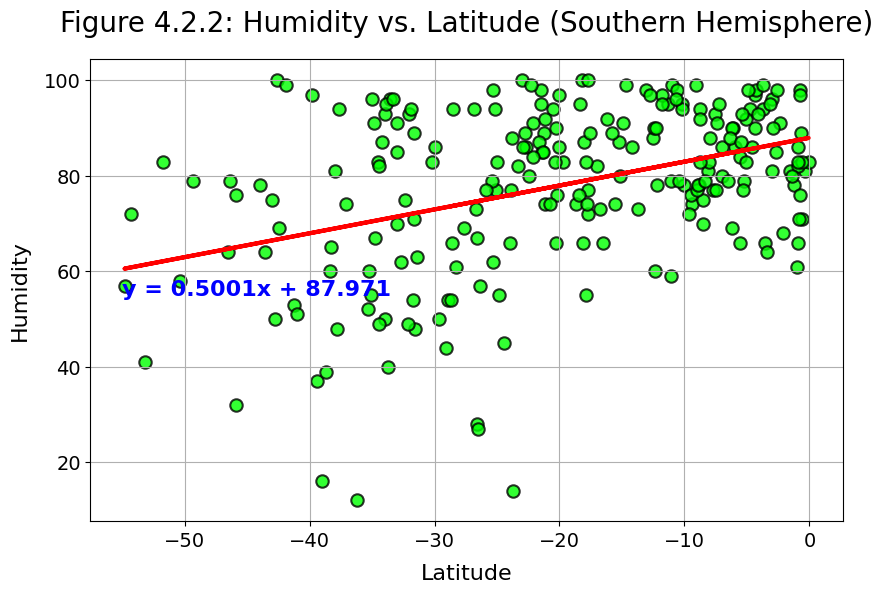

In [34]:
matplotlibx.display_scatter_plot_from_xy_series \
    (southern_dataframe['latitude'], southern_dataframe['humidity'],
     'Figure 4.2.2: Humidity vs. Latitude (Southern Hemisphere)',
     'Latitude' , 'Humidity', 1, -55.0, 55.0)

### **Display Humidity vs. Latitude (Eastern Hemisphere)**

r-value:     0.2681
r-squared:   0.0719



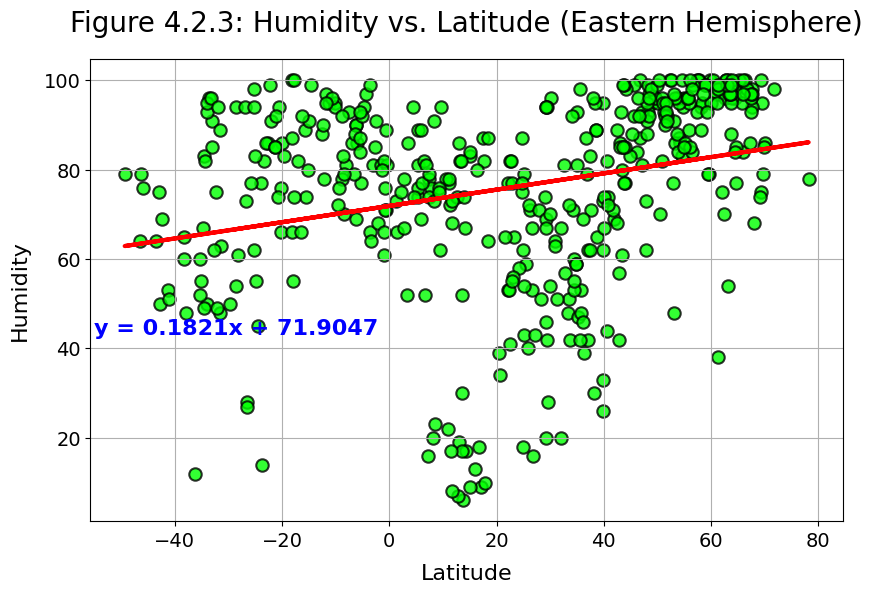

In [35]:
matplotlibx.display_scatter_plot_from_xy_series \
    (eastern_dataframe['latitude'], eastern_dataframe['humidity'],
     'Figure 4.2.3: Humidity vs. Latitude (Eastern Hemisphere)',
     'Latitude' , 'Humidity', 1, -55.0, 43.0)

### **Display Humidity vs. Latitude (Western Hemisphere)**

r-value:     -0.1038
r-squared:   0.0108



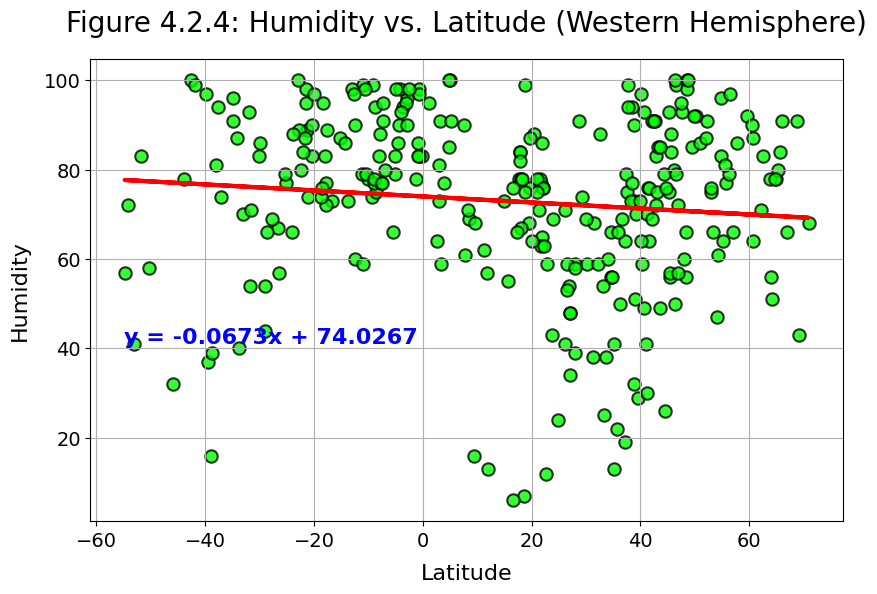

In [36]:
matplotlibx.display_scatter_plot_from_xy_series \
    (western_dataframe['latitude'], western_dataframe['humidity'],
     'Figure 4.2.4: Humidity vs. Latitude (Western Hemisphere)',
     'Latitude' , 'Humidity', 1, -55.0, 41.0)

## **Discussion about the linear relationship:** 
### According to these scatter plots and regression lines, there is a very weak relationship relationship between latitude and humidity in any hemisphere.

## **4.3: Cloudiness vs. Latitude**

### **Display Cloudiness vs. Latitude (Northern Hemisphere)**

r-value:     0.2579
r-squared:   0.0665



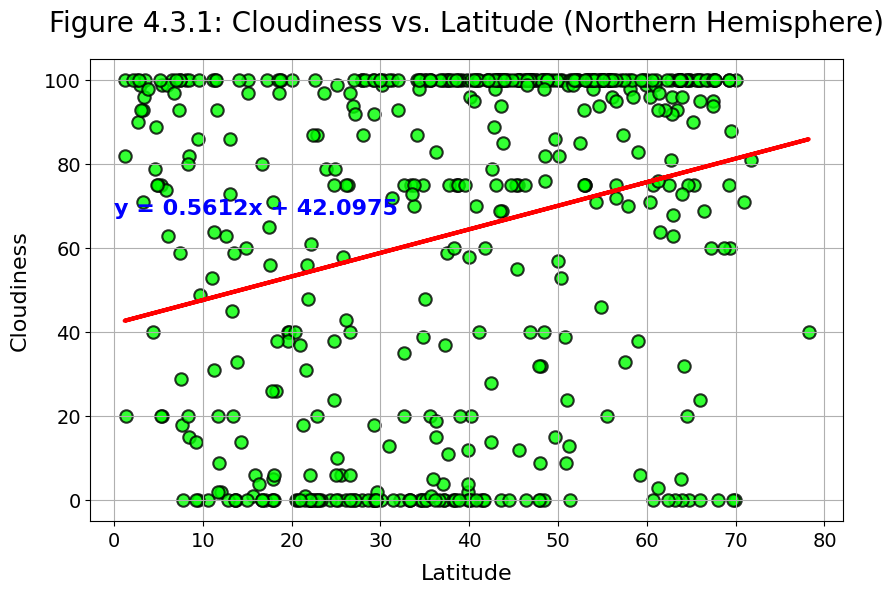

In [37]:
matplotlibx.display_scatter_plot_from_xy_series \
    (northern_dataframe['latitude'], northern_dataframe['cloudiness'],
     'Figure 4.3.1: Cloudiness vs. Latitude (Northern Hemisphere)',
     'Latitude' , 'Cloudiness', 1, 0.0, 68.0)

### **Display Cloudiness vs. Latitude (Southern Hemisphere)**

r-value:     0.3843
r-squared:   0.1477



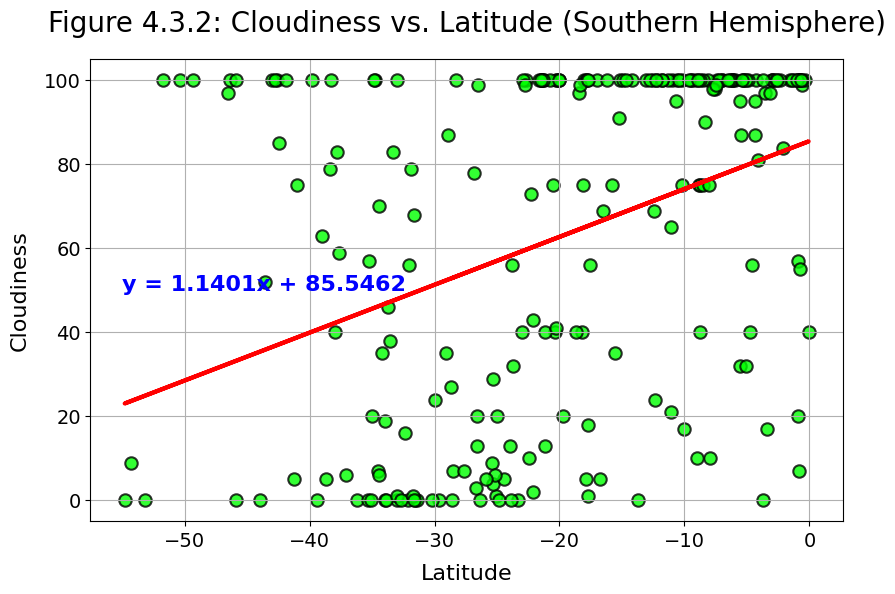

In [38]:
matplotlibx.display_scatter_plot_from_xy_series \
    (southern_dataframe['latitude'], southern_dataframe['cloudiness'],
     'Figure 4.3.2: Cloudiness vs. Latitude (Southern Hemisphere)',
     'Latitude' , 'Cloudiness', 1, -55.0, 50.0)

### **Display Cloudiness vs. Latitude (Eastern Hemisphere)**

r-value:     0.1484
r-squared:   0.0220



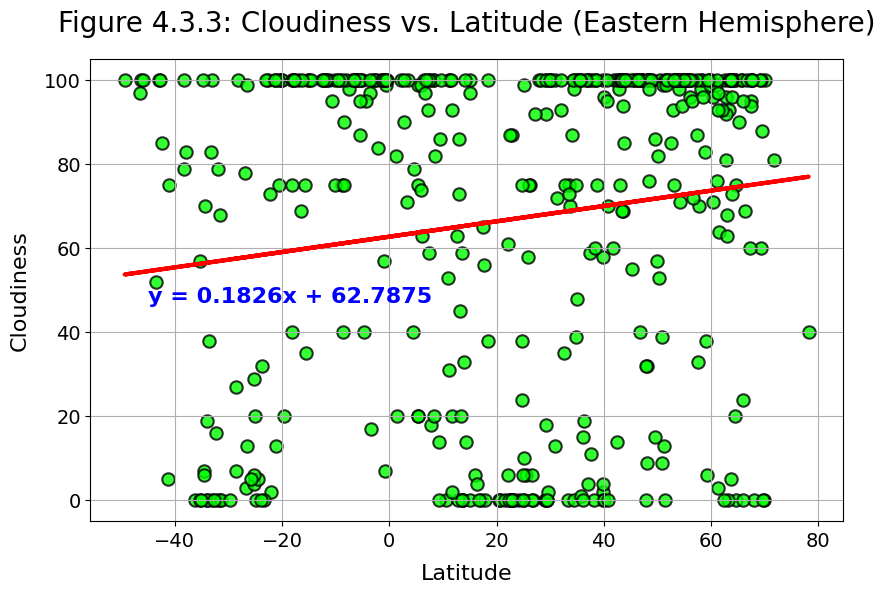

In [39]:
matplotlibx.display_scatter_plot_from_xy_series \
    (eastern_dataframe['latitude'], eastern_dataframe['cloudiness'],
     'Figure 4.3.3: Cloudiness vs. Latitude (Eastern Hemisphere)',
     'Latitude' , 'Cloudiness', 1, -45.0, 47.0)

### **Display Cloudiness vs. Latitude (Western Hemisphere)**

r-value:     0.1553
r-squared:   0.0241



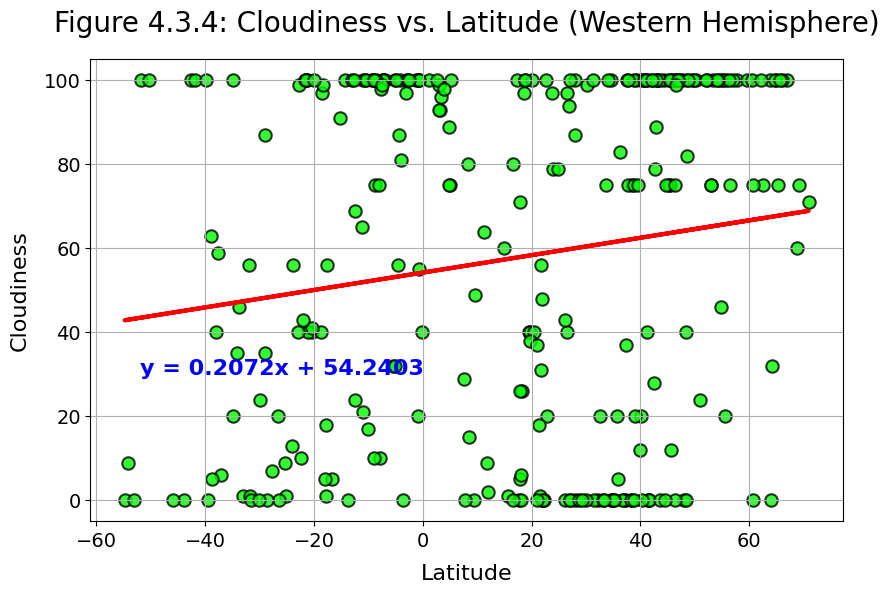

In [40]:
matplotlibx.display_scatter_plot_from_xy_series \
    (western_dataframe['latitude'], western_dataframe['cloudiness'],
     'Figure 4.3.4: Cloudiness vs. Latitude (Western Hemisphere)',
     'Latitude' , 'Cloudiness', 1, -52.0, 30.0)

## **Discussion about the linear relationship:** 
### According to these scatter plots and regression lines, there is a very weak relationship relationship between latitude and cloudiness in any hemisphere.

## **4.4: Wind Speed vs. Latitude**

### **Display Wind Speed vs. Latitude (Northern Hemisphere)**

r-value:     0.1273
r-squared:   0.0162



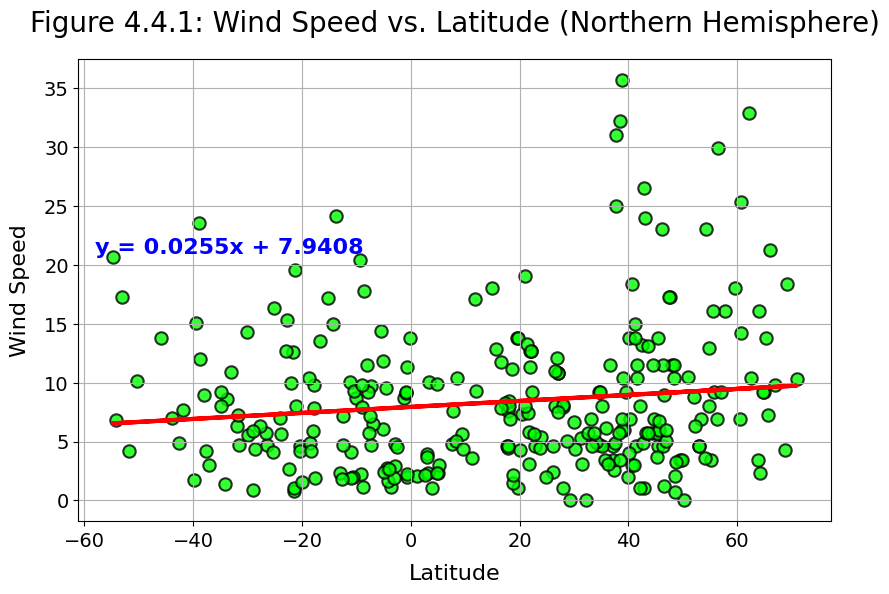

In [41]:
matplotlibx.display_scatter_plot_from_xy_series \
    (western_dataframe['latitude'], western_dataframe['wind_speed'],
     'Figure 4.4.1: Wind Speed vs. Latitude (Northern Hemisphere)',
     'Latitude' , 'Wind Speed', 1, -58.0, 21.0)

### **Display Wind Speed vs. Latitude (Southern Hemisphere)**

r-value:     -0.2218
r-squared:   0.0492



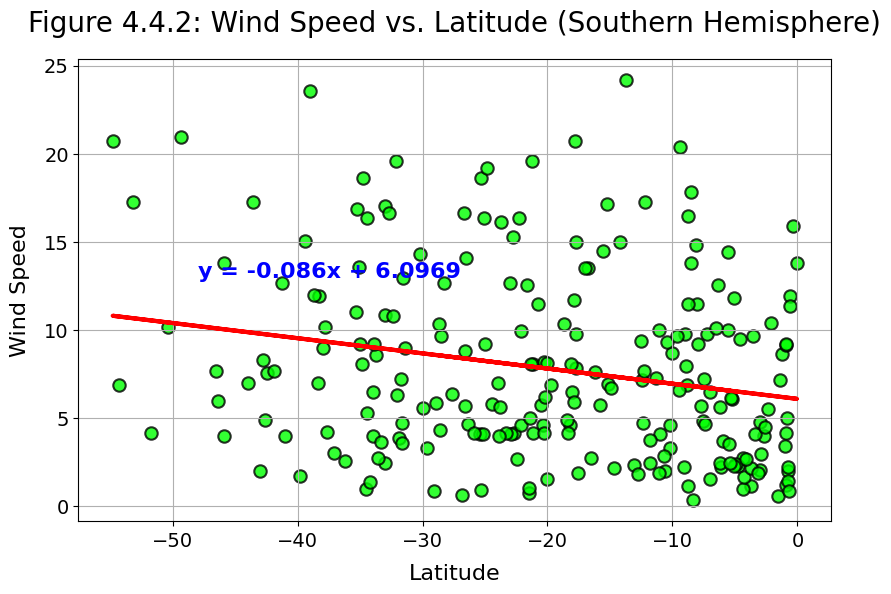

In [42]:
matplotlibx.display_scatter_plot_from_xy_series \
    (southern_dataframe['latitude'], southern_dataframe['wind_speed'],
     'Figure 4.4.2: Wind Speed vs. Latitude (Southern Hemisphere)',
     'Latitude' , 'Wind Speed', 1, -48.0, 13.0)

### **Display Wind Speed vs. Latitude (Eastern Hemisphere)**

r-value:     -0.1008
r-squared:   0.0102



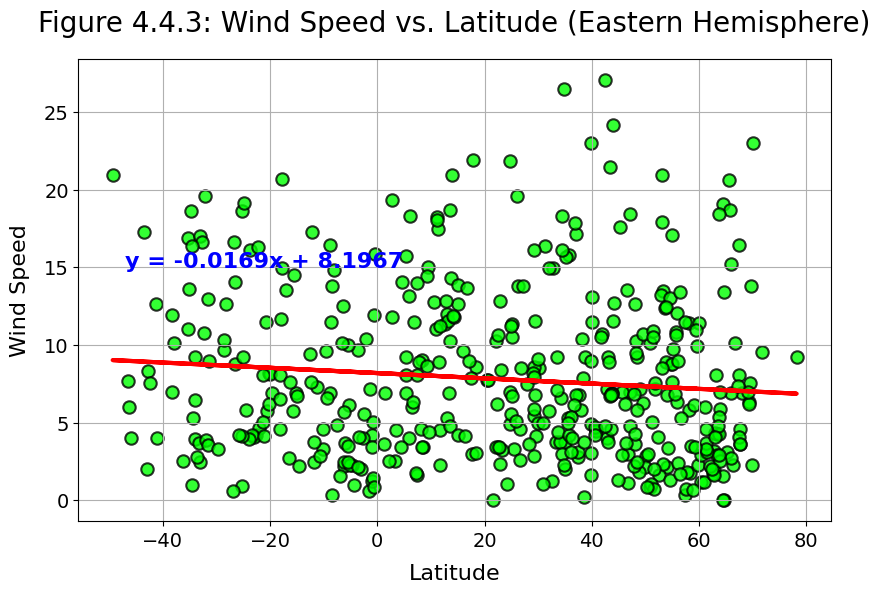

In [43]:
matplotlibx.display_scatter_plot_from_xy_series \
    (eastern_dataframe['latitude'], eastern_dataframe['wind_speed'],
     'Figure 4.4.3: Wind Speed vs. Latitude (Eastern Hemisphere)',
     'Latitude' , 'Wind Speed', 1, -47.0, 15.0)

### **Display Wind Speed vs. Latitude (Western Hemisphere)**

r-value:     0.1273
r-squared:   0.0162



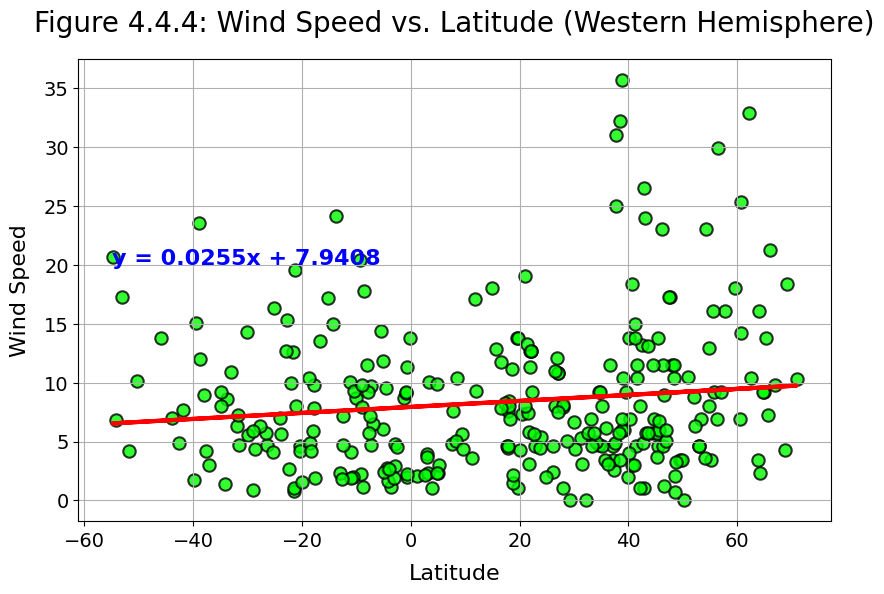

In [44]:
matplotlibx.display_scatter_plot_from_xy_series \
    (western_dataframe['latitude'], western_dataframe['wind_speed'],
     'Figure 4.4.4: Wind Speed vs. Latitude (Western Hemisphere)',
     'Latitude' , 'Wind Speed', 1, -55.0, 20.0)

## **Discussion about the linear relationship:** 
### According to these scatter plots and regression lines, there is a very weak relationship relationship between latitude and wind speed in any hemisphere.

# **Section 5: Scatter Plots w/Linear Regression by Longitude**

## **5.1: Temperature vs. Longitude**

### Display Temperature vs. Longitude (Northern Hemisphere)

r-value:     -0.2168
r-squared:   0.0470



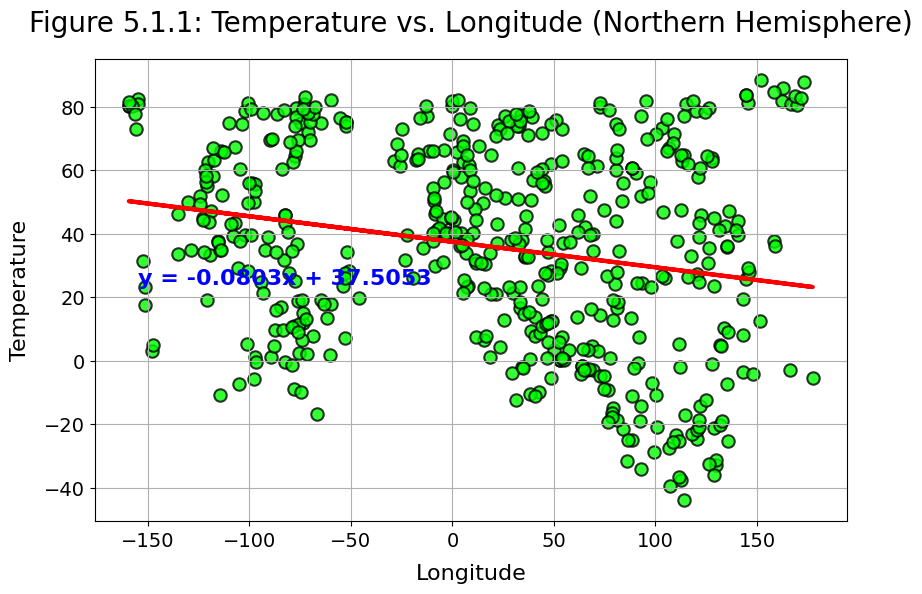

In [45]:
matplotlibx.display_scatter_plot_from_xy_series \
    (northern_dataframe['longitude'], northern_dataframe['temperature'],
     'Figure 5.1.1: Temperature vs. Longitude (Northern Hemisphere)',
     'Longitude' , 'Temperature', 1, -155.0, 24.0)

 ### Display Temperature vs. Longitude (Southern Hemisphere)

r-value:     0.1922
r-squared:   0.0369



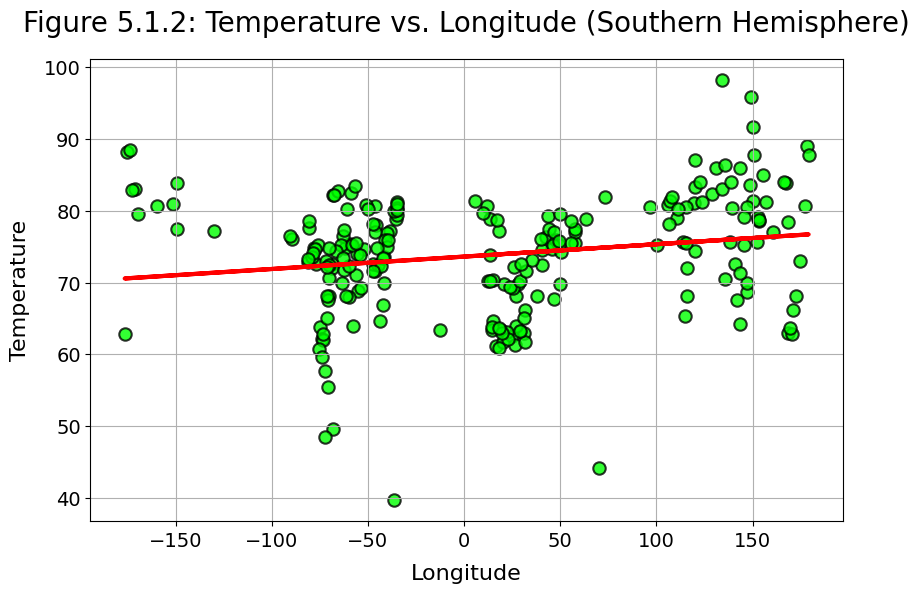

In [46]:
matplotlibx.display_scatter_plot_from_xy_series \
    (southern_dataframe['longitude'], southern_dataframe['temperature'],
     'Figure 5.1.2: Temperature vs. Longitude (Southern Hemisphere)',
     'Longitude', 'Temperature', 1, -170.0, 20.0)

 ### Display Temperature vs. Longitude (Eastern Hemisphere)

r-value:     0.0271
r-squared:   0.0007



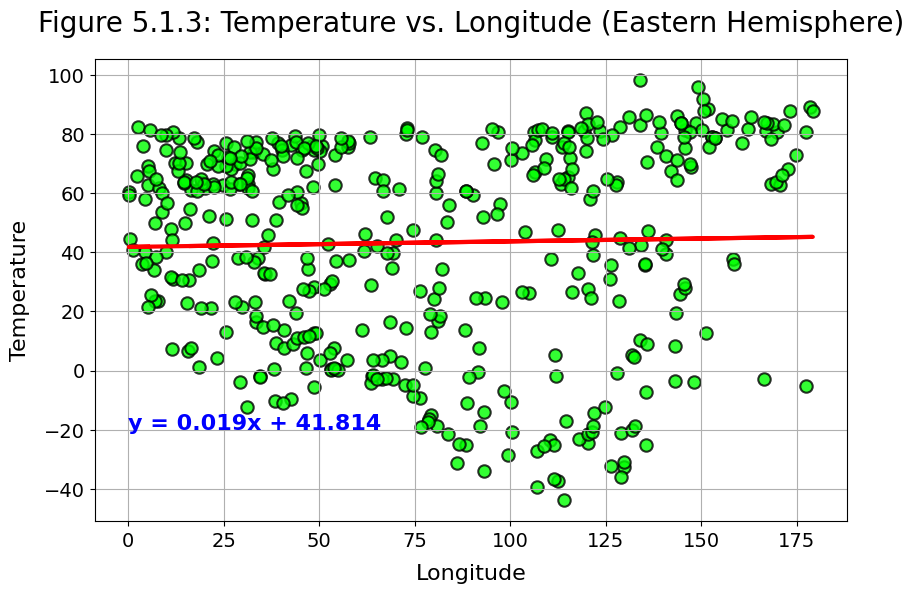

In [47]:
matplotlibx.display_scatter_plot_from_xy_series \
    (eastern_dataframe['longitude'], eastern_dataframe['temperature'],
     'Figure 5.1.3: Temperature vs. Longitude (Eastern Hemisphere)',
     'Longitude', 'Temperature', 1, 0.0, -20.0)

 ### Display Temperature vs. Longitude (Western Hemisphere)

r-value:     0.0581
r-squared:   0.0034



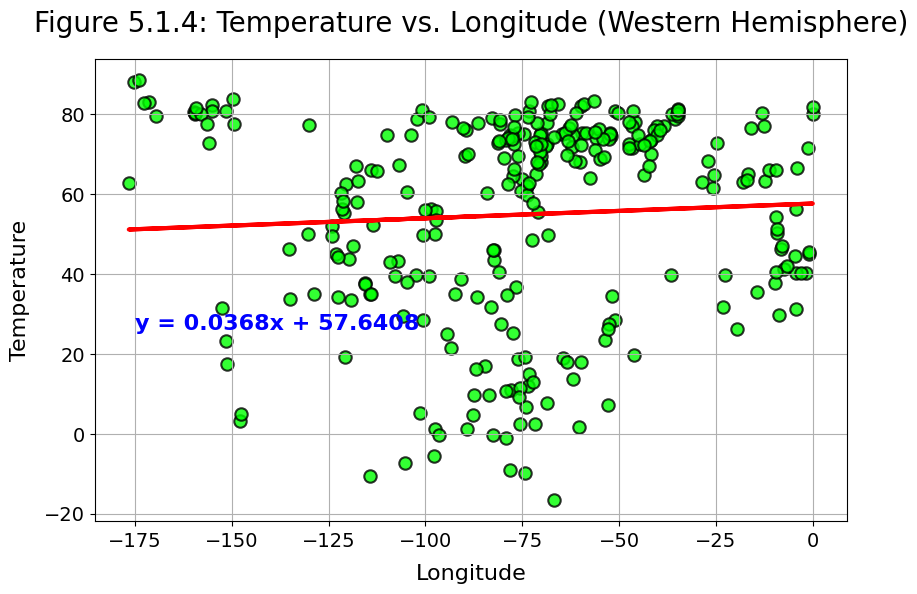

In [48]:
matplotlibx.display_scatter_plot_from_xy_series \
    (western_dataframe['longitude'], western_dataframe['temperature'],
     'Figure 5.1.4: Temperature vs. Longitude (Western Hemisphere)',
     'Longitude', 'Temperature', 1, -175.0, 26.0)

## **Discussion about the linear relationship:** 
### According to these scatter plots and regression lines, there is only a very weak relationship between longitude and temperature in any hemisphere.

## **5.2: Humidity vs. Longitude**

### **Display Humidity vs. Longitude (Northern Hemisphere)**

r-value:     0.1934
r-squared:   0.0374



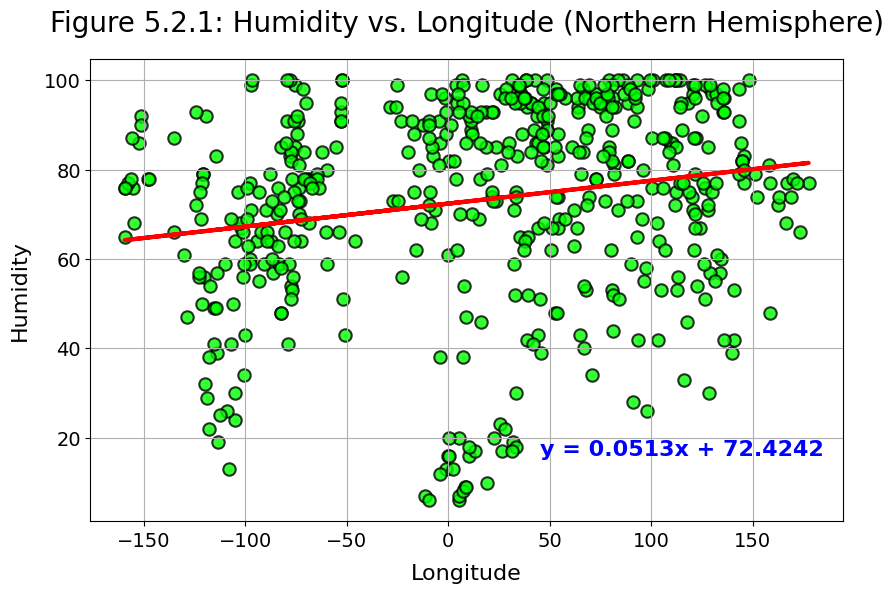

In [49]:
matplotlibx.display_scatter_plot_from_xy_series \
    (northern_dataframe['longitude'], northern_dataframe['humidity'],
     'Figure 5.2.1: Humidity vs. Longitude (Northern Hemisphere)',
     'Longitude', 'Humidity', 1, 45.0, 16.0)

### **Display Humidity vs. Longitude (Southern Hemisphere)**

r-value:     -0.2138
r-squared:   0.0457



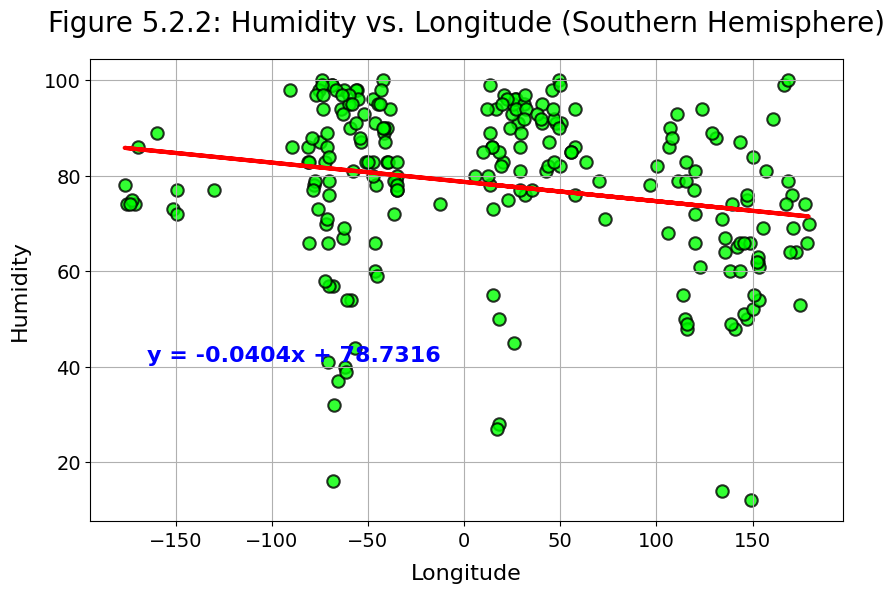

In [50]:
matplotlibx.display_scatter_plot_from_xy_series \
    (southern_dataframe['longitude'], southern_dataframe['humidity'],
     'Figure 5.2.2: Humidity vs. Longitude (Southern Hemisphere)',
     'Longitude', 'Humidity', 1, -165.0, 41.0)

### **Display Humidity vs. Longitude (Eastern Hemisphere)**

r-value:     -0.0081
r-squared:   0.0001



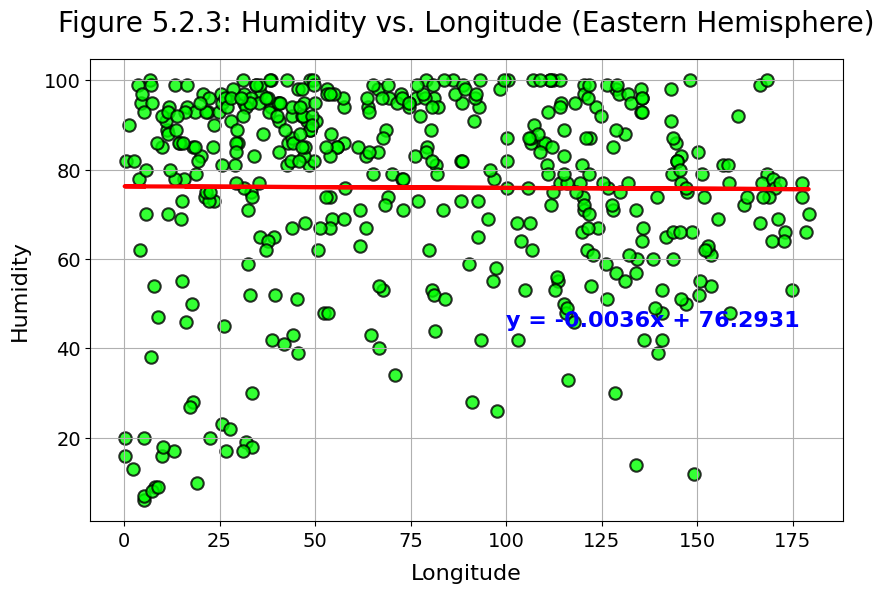

In [51]:
matplotlibx.display_scatter_plot_from_xy_series \
    (eastern_dataframe['longitude'], eastern_dataframe['humidity'],
     'Figure 5.2.3: Humidity vs. Longitude (Eastern Hemisphere)',
     'Longitude', 'Humidity', 1, 100.0, 45.0)

### **Display Humidity vs. Longitude (Western Hemisphere)**

r-value:     0.1425
r-squared:   0.0203



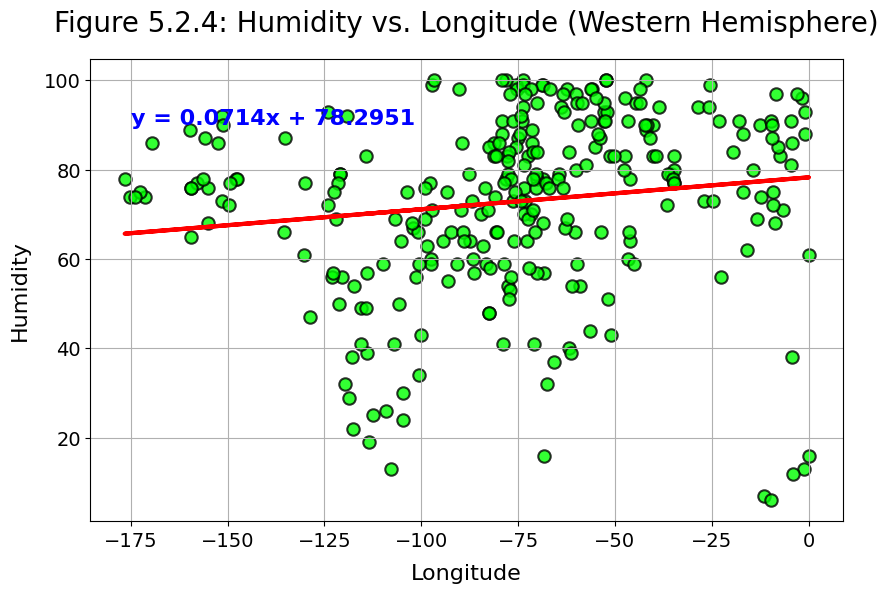

In [52]:
matplotlibx.display_scatter_plot_from_xy_series \
    (western_dataframe['longitude'], western_dataframe['humidity'],
     'Figure 5.2.4: Humidity vs. Longitude (Western Hemisphere)',
     'Longitude', 'Humidity', 1, -175.0, 90.0)

## **Discussion about the linear relationship:** 
### According to these scatter plots and regression lines, there is only a very weak relationship between longitude and humidity in any hemisphere.

## **5.3: Cloudiness vs. Longitude**

### **Display Cloudiness vs. Longitude (Northern Hemisphere)**

r-value:     0.1231
r-squared:   0.0152



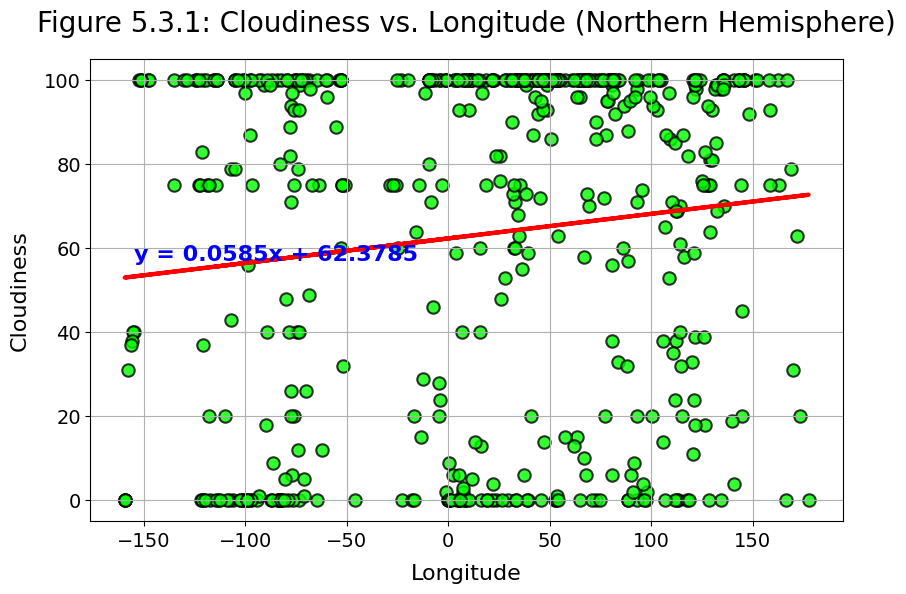

In [53]:
matplotlibx.display_scatter_plot_from_xy_series \
    (northern_dataframe['longitude'], northern_dataframe['cloudiness'],
     'Figure 5.3.1: Cloudiness vs. Longitude (Northern Hemisphere)',
     'Longitude', 'Cloudiness', 1, -155.0, 57.0)

### **Display Cloudiness vs. Longitude (Southern Hemisphere)**

r-value:     0.1231
r-squared:   0.0152



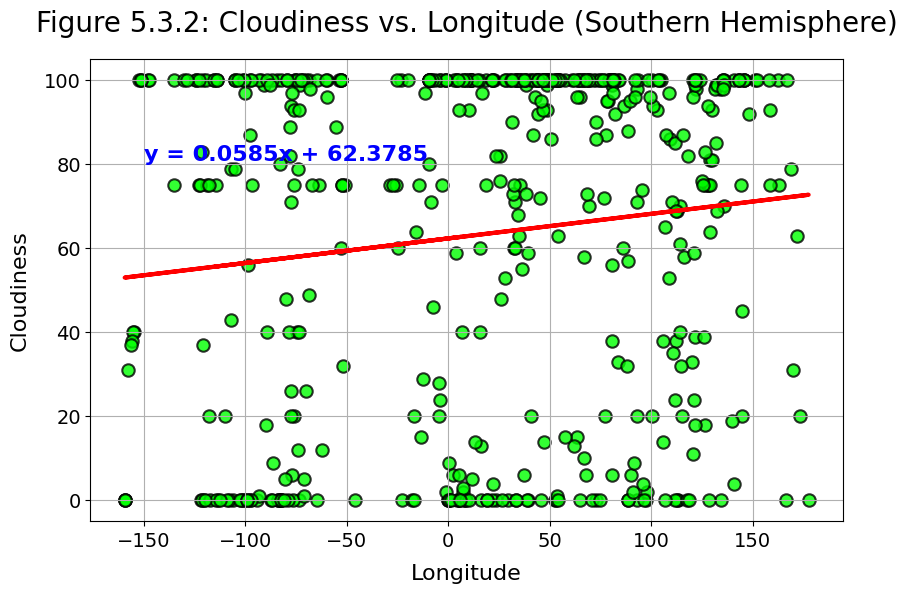

In [54]:
matplotlibx.display_scatter_plot_from_xy_series \
    (northern_dataframe['longitude'], northern_dataframe['cloudiness'],
     'Figure 5.3.2: Cloudiness vs. Longitude (Southern Hemisphere)',
     'Longitude', 'Cloudiness', 1, -150.0, 81.0)

### **Display Cloudiness vs. Longitude (Eastern Hemisphere)**

r-value:     0.0404
r-squared:   0.0016



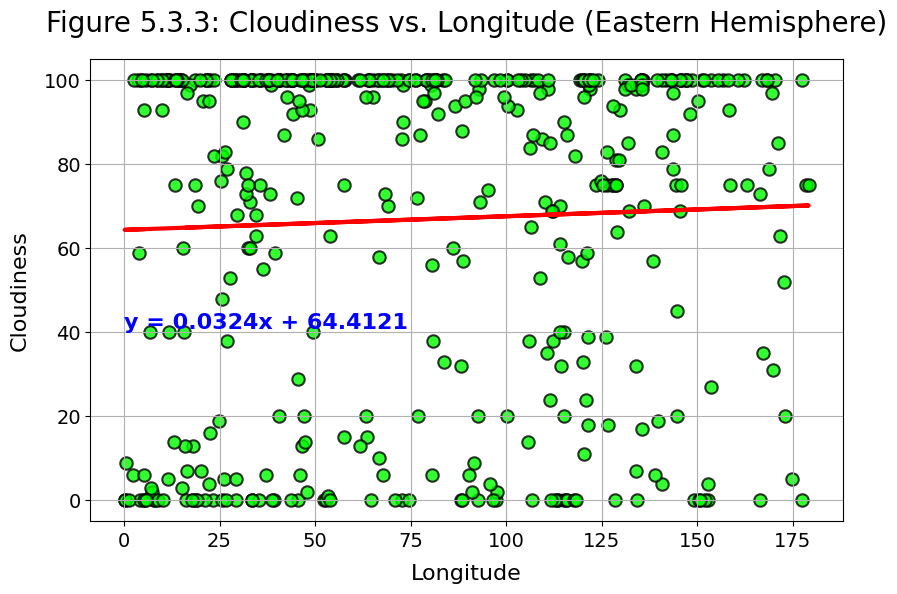

In [55]:
matplotlibx.display_scatter_plot_from_xy_series \
    (eastern_dataframe['longitude'], eastern_dataframe['cloudiness'],
     'Figure 5.3.3: Cloudiness vs. Longitude (Eastern Hemisphere)',
     'Longitude', 'Cloudiness', 1, 0.0, 41.0)

### **Display Cloudiness vs. Longitude (Western Hemisphere)**

r-value:     0.1011
r-squared:   0.0102



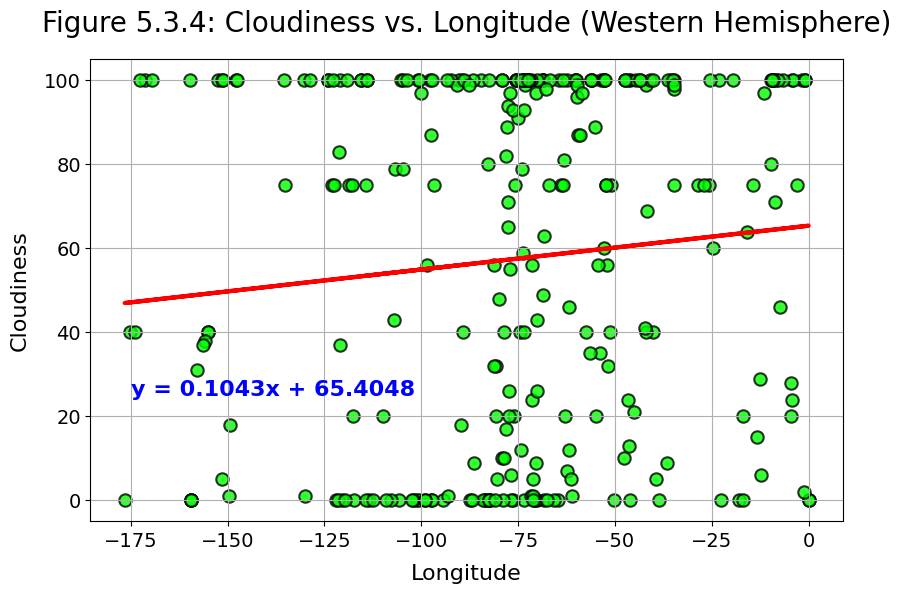

In [56]:
matplotlibx.display_scatter_plot_from_xy_series \
    (western_dataframe['longitude'], western_dataframe['cloudiness'],
     'Figure 5.3.4: Cloudiness vs. Longitude (Western Hemisphere)',
     'Longitude', 'Cloudiness', 1, -175.0, 25.0)

## **Discussion about the linear relationship:** 
### According to these scatter plots and regression lines, there is only a very weak relationship between longitude and cloudiness in any hemisphere.

## **5.4: Wind Speed vs. Longitude**

### **Display Wind Speed vs. Longitude (Northern Hemisphere)**

r-value:     -0.0131
r-squared:   0.0002



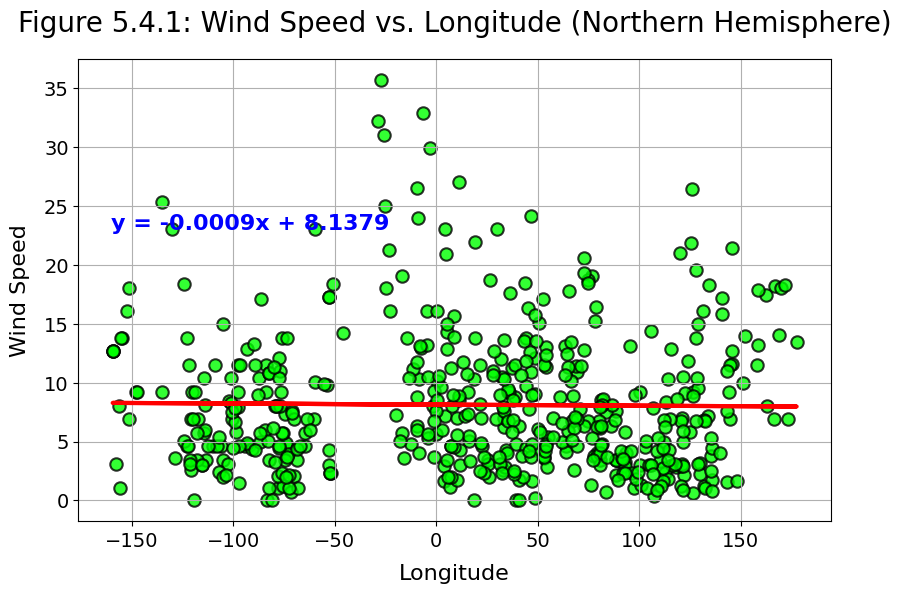

In [57]:
matplotlibx.display_scatter_plot_from_xy_series \
    (northern_dataframe['longitude'], northern_dataframe['wind_speed'],
     'Figure 5.4.1: Wind Speed vs. Longitude (Northern Hemisphere)',
     'Longitude', 'Wind Speed', 1, -160.0, 23.0)

### **Display Wind Speed vs. Longitude (Southern Hemisphere)**

r-value:     0.0795
r-squared:   0.0063



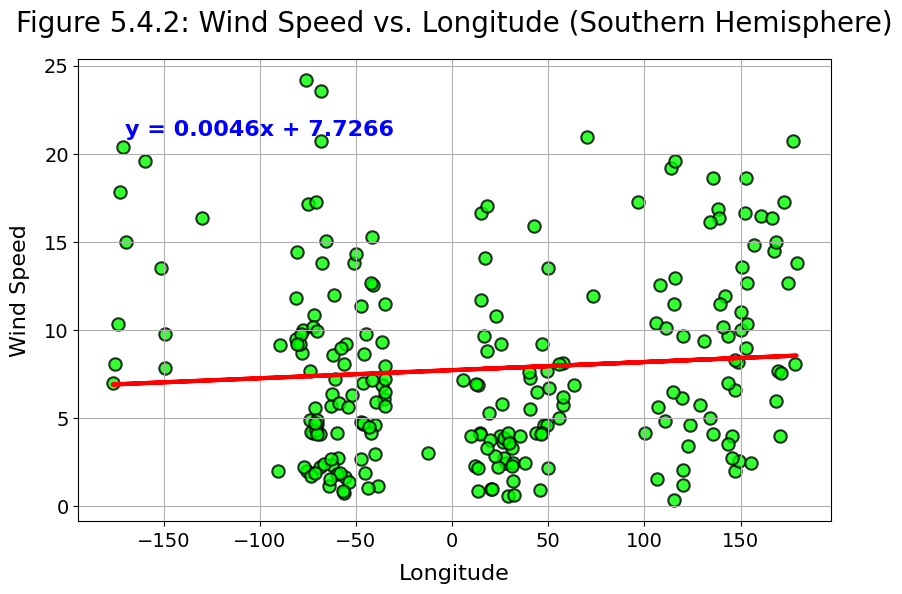

In [58]:
matplotlibx.display_scatter_plot_from_xy_series \
    (southern_dataframe['longitude'], southern_dataframe['wind_speed'],
     'Figure 5.4.2: Wind Speed vs. Longitude (Southern Hemisphere)',
     'Longitude', 'Wind Speed', 1, -170.0, 21.0)

### **Display Wind Speed vs. Longitude (Eastern Hemisphere)**

r-value:     0.1275
r-squared:   0.0163



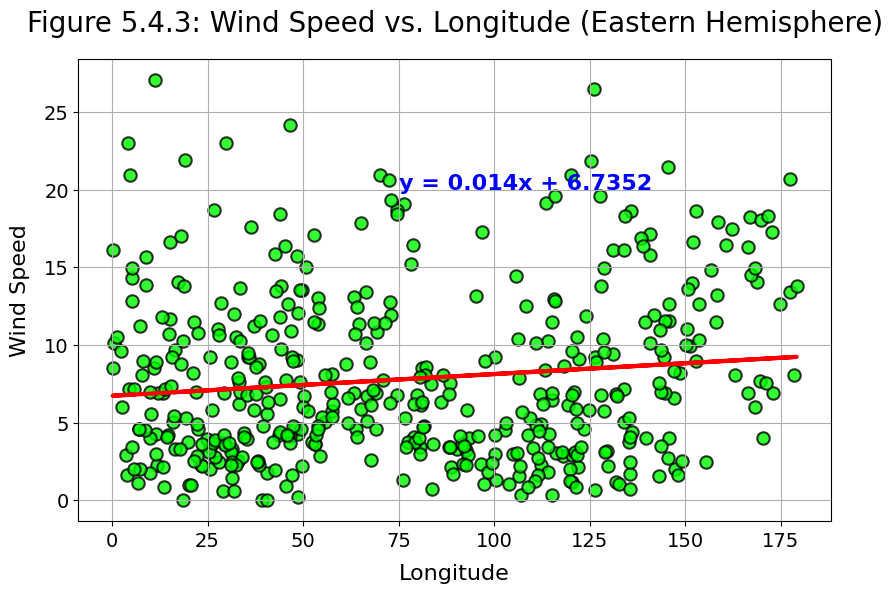

In [59]:
matplotlibx.display_scatter_plot_from_xy_series \
    (eastern_dataframe['longitude'], eastern_dataframe['wind_speed'],
     'Figure 5.4.3: Wind Speed vs. Longitude (Eastern Hemisphere)',
     'Longitude', 'Wind Speed', 1, 75.0, 20.0)

### **Display Wind Speed vs. Longitude (Western Hemisphere)**

r-value:     0.0640
r-squared:   0.0041



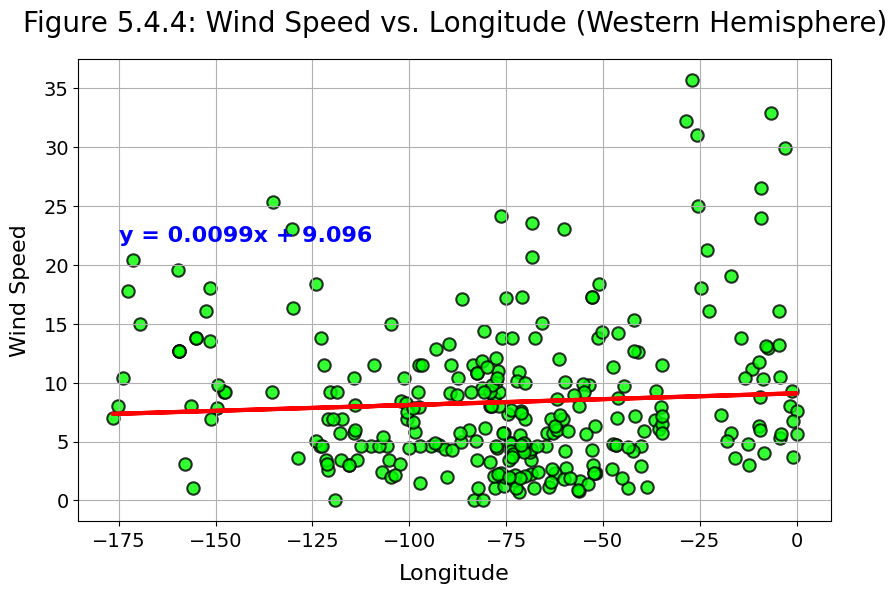

In [60]:
matplotlibx.display_scatter_plot_from_xy_series \
    (western_dataframe['longitude'], western_dataframe['wind_speed'],
     'Figure 5.4.4: Wind Speed vs. Longitude (Western Hemisphere)',
     'Longitude', 'Wind Speed', 1, -175.0, 22.0)

## **Discussion about the linear relationship:** 
### According to these scatter plots and regression lines, there is only a very weak relationship between longitude and wind speed in any hemisphere.

In [61]:
# logx.end_program()